In [1]:
#pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
# Read Data
dataset = pd.read_csv("OnlineRetail.csv")

### Data Understanding

In [4]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
dataset.shape

(541909, 8)

In [7]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are significantly higher null values in CustomerID. 

In [9]:
d=dataset.set_index(['InvoiceDate'])
d.index=pd.to_datetime(d.index)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

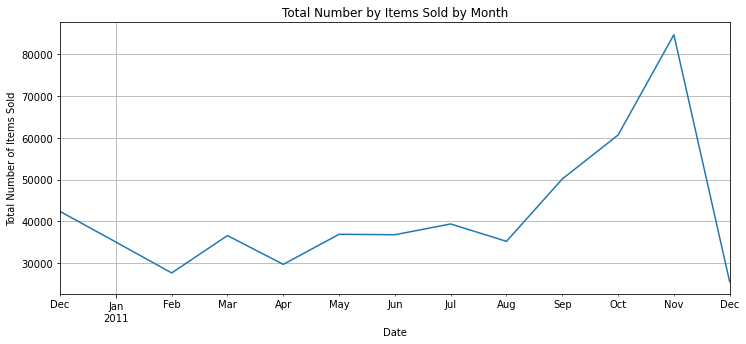

In [10]:
d.resample("M")['Description'].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

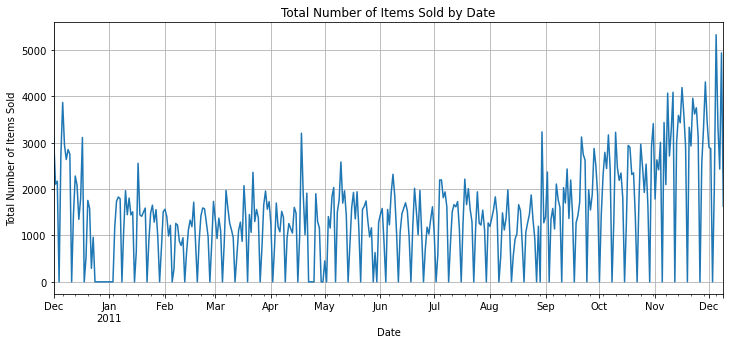

In [11]:
d.resample("D")['Description'].count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

#### Top 10 selling items

In [12]:
dataset.Description.value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

Text(0.5, 1.0, 'Top 10 selling items')

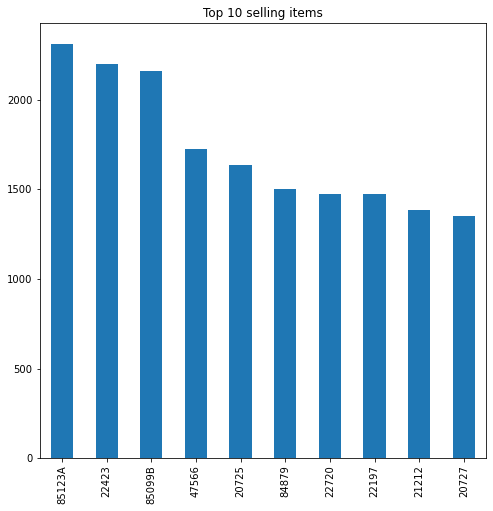

In [13]:
plt.figure(figsize = (8,8))
dataset.StockCode.value_counts().head(10).plot.bar()
plt.title('Top 10 selling items')

#### Top 10 least selling items

In [14]:
dataset.Description.value_counts().tail(10)

ROCOCO WALL MIROR                     1
wrong barcode (22467)                 1
WHITE FRANGIPANI HAIR CLIP            1
CAPIZ CHANDELIER                      1
water damage                          1
CURIOUS IMAGES SCRAP BOOK SET         1
CRYSTAL CHANDELIER T-LIGHT HOLDER     1
ANT SILVER TURQUOISE BOUDICCA RING    1
missing?                              1
MUMMY MOUSE RED GINGHAM RIBBON        1
Name: Description, dtype: int64

### Data Preparation

In [16]:
# Take records with >0 quantity only

dataset = dataset.loc[dataset['Quantity'] > 0]
dataset.shape

(531285, 8)

In [17]:
# Dropping rows with null customerID

dataset = dataset.dropna(subset=['CustomerID'])
dataset.shape

(397924, 8)

In [18]:
dataset['Description'] = dataset['Description'].str.strip()    # Remove the extra spaces
dataset = dataset[~dataset['InvoiceNo'].str.contains('C','A')] # Remove invoice number starting with C(Cancellation) and A (Adjustment)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [20]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Create Customer-Item Matrix

In [21]:
cim = dataset.pivot_table(index='CustomerID',columns='StockCode',values='Quantity',aggfunc='sum')
cim.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


#### To convert NaN value to 0 and value that >=1 to 1
* Lamdba function is chosen 

In [22]:
cim = cim.applymap(lambda x: 1 if x>0 else 0)

cim.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
print('Shape of dataset: ',cim.shape)
print('Customer Value Count: ', dataset['CustomerID'].nunique())
print('Stock Code Value Count: ', dataset['StockCode'].nunique())

Shape of dataset:  (4339, 3665)
Customer Value Count:  4339
Stock Code Value Count:  3665


In [24]:
cim.loc[12350.0].sum() # total quantity of item purchased by specific customer

17

#### Dropping unnecessary column

In [25]:
cim.drop('POST', inplace=True, axis=1)
print('Shape of dataset: ',cim.shape)

Shape of dataset:  (4339, 3664)


### Generating Frequent Item Sets

* Taking for frequent item sets with 6% of Support

In [26]:
f_itemsets = apriori(cim, min_support=0.06, use_colnames=True)

f_itemsets.shape

(214, 2)

In [27]:
f_itemsets.head()

,support,itemsets
0,0.075824,(20685)
1,0.077207,(20724)
2,0.122609,(20725)
3,0.085734,(20726)
4,0.105554,(20727)


### Building Association Rules

In [28]:
ar = association_rules(f_itemsets, metric="lift", min_threshold=1)  # setting the threshold of Lift Value as 1.
ar.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20727),(20725),0.105554,0.122609,0.069140,0.655022,5.342368,0.056198,2.543324
1,(20725),(20727),0.122609,0.105554,0.069140,0.563910,5.342368,0.056198,2.051057
2,(20728),(20725),0.110394,0.122609,0.070984,0.643006,5.244369,0.057449,2.457721
3,(20725),(20728),0.122609,0.110394,0.070984,0.578947,5.244369,0.057449,2.112814
4,(22382),(20725),0.112929,0.122609,0.069601,0.616327,5.026768,0.055755,2.286817
5,(20725),(22382),0.122609,0.112929,0.069601,0.567669,5.026768,0.055755,2.051833
6,(22383),(20725),0.100023,0.122609,0.065222,0.652074,5.318323,0.052959,2.521773
7,(20725),(22383),0.122609,0.100023,0.065222,0.531955,5.318323,0.052959,1.922842
8,(22384),(20725),0.102328,0.122609,0.067988,0.664414,5.418974,0.055442,2.614508
9,(20725),(22384),0.122609,0.102328,0.067988,0.554511,5.418974,0.055442,2.015028


#### Visualizing Relationship between Support, Confidence, and Life value

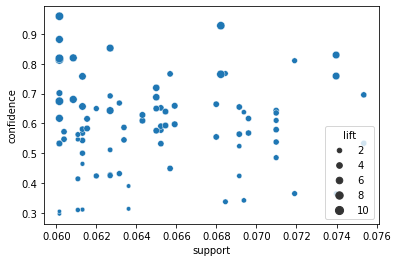

In [29]:
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = ar)
plt.show()

We can see that the higher the confidence, the higher the lift value.

In [30]:
# to look for a large lift (6) and high confidence (.8).
ar[ (ar['lift'] >= 6) & (ar['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
61,(22698),(22697),0.073519,0.089191,0.068218,0.927900,10.403506,0.061661,12.632524
62,(22697),(22699),0.089191,0.097488,0.073980,0.829457,8.508311,0.065285,5.292003
65,(22698),(22699),0.073519,0.097488,0.062687,0.852665,8.746363,0.055520,6.125561
68,(22726),(22727),0.074211,0.089422,0.060844,0.819876,9.168662,0.054207,5.055280
80,"(22697, 22699)",(22698),0.073980,0.073519,0.060152,0.813084,11.059473,0.054713,4.956672
81,"(22697, 22698)",(22699),0.068218,0.097488,0.060152,0.881757,9.044781,0.053502,7.632674
82,"(22699, 22698)",(22697),0.062687,0.089191,0.060152,0.959559,10.758464,0.054561,22.521821
85,(22698),"(22697, 22699)",0.073519,0.073980,0.060152,0.818182,11.059473,0.054713,5.093109


Interpretation of index 82:
* The purchase rate (support) of item (22698, 22699) and (22697) together is 0.060.
* The percentage of customer who buy item (22698, 22699) also buy (22697) is 95.96%.
* The purchase rate of buying (22697) is increased by 10.76 times when (22698, 22699) is bought.